# Extra Assignment Report


- **Course**: Data Mining
- **Student Name**: Enes Kemal Ergin

Item 1. Explain Bias-Variance Tradeoff in predictive models
---

Predictive models gives us a convenient way and predict some insights about the new data by using not really tangible function that works behind it, which resulted in some errors caused by Bias and  variance of the data. We cannot fully get rid of them because our learning algorithms are not designed to fully predict new data from what it has been trained with. Bias-Variance Tradeoff is what we see in every learning algorithm, some has high bias and low variance such as Linear and Logistic regression, and some has low bias and high variance such as Decision trees, KNN, SVM. What we try to achieve is low bias and low variance but it's not really possible since they are connected to one and other.

![](./figures/bias-and-variance.jpg) [Source: KDNuggets-08-2016](http://www.kdnuggets.com/2016/08/bias-variance-tradeoff-overview.html)

Let's go deeper in what is Bias and Variance differently:

- __Bias__ is making our assumptions from the data simpler. If the Bias is high the algorithm will work faster with lower predictive power. On the other hand, if the bias is lower, the algorithm will have to work more to understand the data and make more complex assumptions with higher predictive power. 
- __Variance__ is the amount that the estimate of the target function will change given different training data. With low variance makes/suggests small changes, when high variance makes/suggests bigger changes to the estimate of the target function with changes to the training dataset.

---

Item 2. Explain Class Imbalance problem in classification problems
---

To explain this I would like to remark on one of my previous experience where I had to deal with a binary classification problem for genomics data. As like in most of the real life data, targets are not equally seperated in terms of counts. In my case it was 93-95% of Unbound(0) and only 5-7% Bound(1) data. In order to get a precise scoring at the end of the predictive model. We have to have balanced data, because we cannot really understand of the model is working or not. Imagine if I would get the data as it is without taking balanced numbered of each class, and if I would check the accuracy it will show around 93-95% which is exactly what we would get when we put only 0's as our predicted output. To overcome this issue we can perform undersampling if the data is large enough with smaller percentaged label, like it was in my case. Or we can perform oversampling by creating artificial entities to our data, which is kind of more complex. 

Item 3. Explain Overfitting and Underfitting in predictive modeling
---
__Overfitting__ occurs when the learning algorithm captures the noise of the data/ memorizes the data. It occurs when there is low bias and high variance. Sometimes it is too obvious that model is overfitted the data from the train and test results. To see if the model is overfitting the data and to overcome the problem we should use different models for the data, and use validation methods to check the accuracy of the test data. It seems in mostly complext models.

__Underfitting__ occurs when the learning algorithm cannot capture the pattern enough for the data. If the model is too simple and it has low variance and high bias it results to underfitting.

The following code produces 3 graphs that represents the Overfitting, normal, and Underfitting Liner regression with polynomial features. ([Source: Sklearn Documentation](http://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html)) 

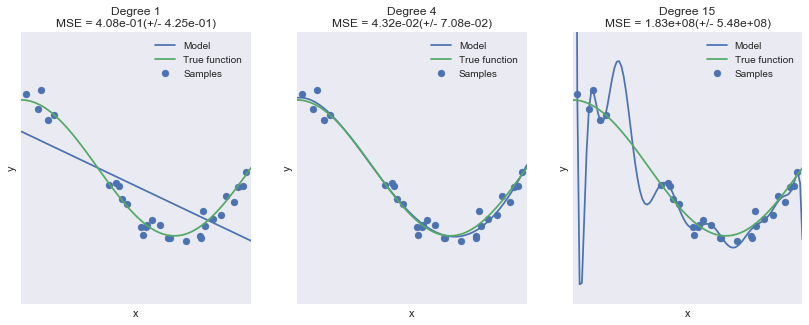

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

np.random.seed(0)

n_samples = 30
degrees = [1, 4, 15]

true_fun = lambda X: np.cos(1.5 * np.pi * X)
X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degrees[i], -scores.mean(), scores.std()))
plt.show()

---

Item 4. Explain Regularization (methods) and Generalization in predictive modeling
---

**Regularization** is a techniques to reduce the chance of overfitting or underfitting. How? Let me explain. Using regularization we are tuning and tweaking the parameters of the model but I am not just talking about tweaking the parameters when we first define the model but in some cases we can change the complexity of the model when the model is training (such example is poolning layer in deep neural networks). By selecting a better complexity for our model we are helping the **generalization** of the model, which literally means the overall success of the model.  We can use cross-validation to see how well our model is doing and tweak the parameters after the results of cross-validation. 

---

Item 5. Explain the role of Loss functions in Regression models and give at least 3 examples for regression loss functions; their definitions, formulas, pros and cons
---





---

Item 6. Explain the role of Loss functions in Classification models and give at least 3 examples for classification loss functions; their definitions, formulas, pros and cons
---


---

Item 7. Explain the Error metrics used in evaluating Classification models and give at least 3 examples for classification error metrics; their definitions, formulas, pros and cons
---



---

Item 8. Explain the Error metrics used in evaluating Regression models and give at least 3 examples for regression error metrics; their definitions, formulas, pros and cons
---


---

Item 9. Explain the Distance metrics used in similarity of data instances and give at least 3 examples for distance metrics; their definitions, formulas, pros and cons
---

---

Item 10. Explain the Accuracy and Precision in data quality
---
Accuracy is the measurement of how close the prediction to the teoratically true value, where precision is the measurement of how different measurements are close to each other. In data quality what we try to achieve is max accuracy and precision, as it demonstrated in the figure [(Source)](http://www.dnasoftware.com/our-products/copycount/precision-and-accuracy/)

![Accuracy and Precision](./figures/targets.png)

---

Item 11. Explain the Variable Transformation in data processing
--- 
Variable transformation is a required step for some types of data before starting analysis and to build learning models. It allows us to change the type of the data where we can use it for the proper kind of algorithm. For example, sometimes the data is in text format but we needed them to be in continuous numeric format which we could use it in regression. This is where the transformation should occur.  


---

Item 12. Explain the Validation Methods in evaluating predictive models and give at least 3 examples for validation methods; their definitions, formulas, pros and cons
---


---

Item 13. Explain Scaling methods used in data preprocessing and give at least 3 examples for scaling methods; their definitions, formulas, pros and cons
---

Scaling methods used to generalize/standartize the range of the data in columns (features). There are many scaling methods are used in data preprocessing such as Z-score normalization, Min-Max scaling, and max scaling. 

__Z-score normalization:__ also called (standardization) scales the values with properties of mean=0 and standard deviation=1
$$
z = \frac{x - \mu}{\sigma}
$$

__Min-Max scaling__ also called normalization scales the values in between [0,1] with using a very basic approach:

$$
X_{norm} = \frac{X - X_{min}}{X_{max}-X_{min}}
$$

The both approach has their pros and cons but the biggest decision making is happened when it comes to selecting an algorithm. For example if we are working on image processing and the scale metter is for RGB is (0,255) its better be used Min-Max scaling, rather than standardization. For clustering analysis standardization is almost unbeatable, selecting normalization would be just a bad decision.

---

Item 14. Explain Ensemble modeling methods (bagging, boosting and random forest); their definitions, formulas, pros and cons
---

Ensemble modeling is an approach that has not only one machine learning algorithm to complete the task but multiple to make it less biased. This way we can build a stack of learning algorithms that works way better than the single learning algorithm for specific set of data.

__Bagging:__ (Bootstrap Aggregating)  is an ensemble method. First, we create random samples of the training data set (sub sets of training data set). Then, we build a classifier for each sample. Finally, results of these multiple classifiers are combined using average or majority voting. Bagging helps to reduce the variance error.

![Bagging Explained](./figures/bagging.png)

__Boosting:__ provides sequential learning of the predictors. The first predictor is learned on the whole data set, while the following are learnt on the training set based on the performance of the previous one. It starts by classifying original data set and giving equal weights to each observation. If classes are predicted incorrectly using the first learner, then it gives higher weight to the missed classified observation. Being an iterative process, it continues to add classifier learner until a limit is reached in the number of models or accuracy. Boosting has shown better predictive accuracy than bagging, but it also tends to over-fit the training data as well. 

![Boosting Explained](./figures/boosting1.png)

__Random Forests:__ Random Forests are an improvement over bagged decision trees.Combining predictions from multiple models in ensembles works better if the predictions from the sub-models are uncorrelated or at best weakly correlated. Random forest changes the algorithm for the way that the sub-trees are learned so that the resulting predictions from all of the subtrees have less correlation.

[Source: Analytics Vidhya Ensemble Modeling](https://www.analyticsvidhya.com/blog/2015/09/questions-ensemble-modeling/)

---

Item 15. Explain Gain Ratio and Information Gain used in Decision Tree modeling
---

**Information gain** is biased towards choosing attributes with a large number of values as root nodes, where **Gain ration** corrects information gain by taking the intrinsic information of a split into account. 

---

Item 16. Use any dataset of your interest (classification or regression), cluster the data (input columns) using two clustering algorithms and then compare the clustering results by the cluster evaluating metrics.
---